# Trabalho de Python Verão 2018

#  

## Corretora escolhida: Bitlish

## Aluno: Gabriel Mesquita

In [486]:
import pandas as pd
import ccxt
import datetime
import sqlite3

conn = sqlite3.connect('bilish.db')

from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Selecionando a exchange

In [372]:
exchange = ccxt.bitlish()

### Pares que são negociados nessa exchange

In [373]:
markets = exchange.load_markets()
market_pairs = list(markets.keys())
market_pairs

['BTC/EUR',
 'BTC/RUB',
 'BTC/USD',
 'BTG/BTC',
 'DASH/BTC',
 'DASH/EUR',
 'DASH/RUB',
 'DASH/USD',
 'ETH/BTC',
 'ETH/EUR',
 'ETH/RUB',
 'ETH/USD',
 'LTC/BTC',
 'LTC/EUR',
 'LTC/RUB',
 'LTC/USD',
 'DOGE/BTC',
 'XMR/BTC',
 'ZEC/BTC',
 'ZEC/EUR',
 'ZEC/RUB',
 'ZEC/USD']

### Capturando dados OHLCV

#### Nessa Exchange o único parametro exigido é o time_range, retornando os dados de todos os pares com frequencia de 1h, a API tem limite de requisições e nao tem a possibilidade de capturar dados de 5min


In [374]:
params = {'time_range':[exchange.parse8601('2017-11-01 00:00:00')/1000, exchange.parse8601('2017-12-01 00:00:00')/1000]}

In [375]:
ohlcv = exchange.fetch_ohlcv('', params=params)

#### Funcao para tratar os dados das requisicoes de OHLCV, salvando em um dataframe

In [376]:
def ohlcv_df(ohlcv):
    data=[]
    for frame in ohlcv['list']:
        from_ = frame['from']
        to_ = frame['to']
        try:
            for pair in frame['data'].keys():
                close = frame['data'][pair]['close']
                close_ts = frame['data'][pair]['close_ts']
                high = frame['data'][pair]['high']
                low = frame['data'][pair]['low']
                open_ = frame['data'][pair]['open']
                open_ts = frame['data'][pair]['open_ts']
                volume = frame['data'][pair]['volume']
                data.append((pair, from_, to_, open_, open_ts, close, close_ts, high, low, volume))
                #yield (pair, from_, to_, open_, open_ts, close, close_ts, high, low, volume)
        except:
            pass
    df= pd.DataFrame(data, columns=['Market', 'From','To', 'Open', 'Open_ts', 'Close', 'Close_ts', 'High', 'Low', 'Volume'])
    
    df['Open_ts'] = pd.to_datetime(df['Open_ts'], unit = 'us')
    df['Close_ts'] = pd.to_datetime(df['Close_ts'], unit = 'us')
    df['From'] = pd.to_datetime(df['From'], unit = 's')
    df['To'] = pd.to_datetime(df['To'], unit = 's')
    
    df['Close'] = pd.to_numeric(df['Close'])
    
    return df

#### Funcao que recebe uma lista de time_ranges, captura os dados OHLCV e salva tudo em um dataFrame

In [377]:
def ohlcv(time_ranges):
    df= pd.DataFrame(columns=['Market', 'From','To', 'Open', 'Open_ts', 'Close', 'Close_ts', 'High', 'Low', 'Volume'])
    for time_range in time_ranges:
        params = {'time_range':time_range}
        df= pd.concat([df, ohlcv_df(exchange.fetch_ohlcv('', params=params))])
        print(time_range)
        df['Open_ts'] = pd.to_datetime(df['Open_ts'], unit = 'us')
        df['Close_ts'] = pd.to_datetime(df['Close_ts'], unit = 'us')
        df['From'] = pd.to_datetime(df['From'], unit = 's')
        df['To'] = pd.to_datetime(df['To'], unit = 's')

        df['Close'] = pd.to_numeric(df['Close'])
        df['Open'] = pd.to_numeric(df['Open'])
        df['High'] = pd.to_numeric(df['High'])
        df['Low'] = pd.to_numeric(df['Low'])
        df['Volume'] = pd.to_numeric(df['Volume'])
    return df

#### Captura de dados OHLCV no periodo de 1 ano. Separando em time_ranges mensais

In [378]:

time_ranges = [[exchange.parse8601('2017-01-01 00:00:00')/1000, exchange.parse8601('2017-02-01 00:00:00')/1000],
[exchange.parse8601('2017-02-01 00:00:00')/1000, exchange.parse8601('2017-03-01 00:00:00')/1000],
[exchange.parse8601('2017-03-01 00:00:00')/1000, exchange.parse8601('2017-04-01 00:00:00')/1000],
[exchange.parse8601('2017-04-01 00:00:00')/1000, exchange.parse8601('2017-05-01 00:00:00')/1000],
[exchange.parse8601('2017-05-01 00:00:00')/1000, exchange.parse8601('2017-06-01 00:00:00')/1000],
[exchange.parse8601('2017-06-01 00:00:00')/1000, exchange.parse8601('2017-07-01 00:00:00')/1000],
[exchange.parse8601('2017-07-01 00:00:00')/1000, exchange.parse8601('2017-08-01 00:00:00')/1000],
[exchange.parse8601('2017-08-01 00:00:00')/1000, exchange.parse8601('2017-09-01 00:00:00')/1000],
[exchange.parse8601('2017-09-01 00:00:00')/1000, exchange.parse8601('2017-10-01 00:00:00')/1000],
[exchange.parse8601('2017-10-01 00:00:00')/1000, exchange.parse8601('2017-11-01 00:00:00')/1000],
[exchange.parse8601('2017-11-01 00:00:00')/1000, exchange.parse8601('2017-12-01 00:00:00')/1000],
[exchange.parse8601('2017-12-01 00:00:00')/1000, exchange.parse8601('2018-01-01 00:00:00')/1000]]

df_ohlcv = ohlcv(time_ranges)

[1483228800.0, 1485907200.0]
[1485907200.0, 1488326400.0]
[1488326400.0, 1491004800.0]
[1491004800.0, 1493596800.0]
[1493596800.0, 1496275200.0]
[1496275200.0, 1498867200.0]
[1498867200.0, 1501545600.0]
[1501545600.0, 1504224000.0]
[1504224000.0, 1506816000.0]
[1506816000.0, 1509494400.0]
[1509494400.0, 1512086400.0]
[1512086400.0, 1514764800.0]


In [380]:
df_ohlcv.head()

,Market,From,To,Open,Open_ts,Close,Close_ts,High,Low,Volume
0,btceur,2017-01-01,2017-01-01 01:00:00,918.80,2017-01-01 00:15:00.595750,919.0,2017-01-01 00:53:31.979589,919.0,918.80,0.02
1,btcrub,2017-01-01,2017-01-01 01:00:00,58566.00,2017-01-01 00:15:01.557031,58638.0,2017-01-01 00:53:32.918503,58638.0,58566.00,0.02
2,btcusd,2017-01-01,2017-01-01 01:00:00,968.30,2017-01-01 00:15:01.060046,970.3,2017-01-01 00:53:32.456237,970.3,968.30,0.02
3,etheur,2017-01-01,2017-01-01 01:00:00,7.73,2017-01-01 00:15:00.707510,7.9,2017-01-01 00:53:32.101230,7.9,7.73,0.02
4,ethrub,2017-01-01,2017-01-01 01:00:00,492.00,2017-01-01 00:15:01.681647,492.0,2017-01-01 00:15:01.681647,492.0,492.00,0.01


### Salvando o DataFrame na tabela OHLCV do sqlite

In [379]:
df_ohlcv.to_sql('OHLCV', conn)

## Fetch Trades

### A API da Bitlish nao permite captura de Trades historicos, o unico parametro e o par que desejamos os trades, retornando os ultimos 100 trades.

In [381]:
pairs = ['BTC/USD', 'ETH/USD', 'LTC/USD']

In [382]:
#Retorna um dataframe com os ultimos 100 trades de todos os pares na lista pairs
def trades_df(pairs):
    data = []
    for pair in pairs:
        fetch_trades = exchange.fetch_trades(pair)
        for frame in fetch_trades:
            datetime = frame['timestamp']
            amount = frame['amount']
            price = frame['price']
            direction = frame['side']
            data.append([pair, datetime, amount, price, direction])
    df= pd.DataFrame(data, columns=['Market', 'Datetime', 'Amount','Price', 'Direction'])
    df['Datetime'] = pd.to_datetime(df['Datetime'], unit = 'ms')
    df['Amount'] = pd.to_numeric(df['Amount'])
    df['Price'] = pd.to_numeric(df['Price'])
    return df

In [383]:
df = trades_df(pairs)

In [384]:
df.head()

,Market,Datetime,Amount,Price,Direction
0,BTC/USD,2018-01-27 08:04:07.430,0.039806,11444.4,sell
1,BTC/USD,2018-01-27 09:48:21.817,0.008019,11395.4,sell
2,BTC/USD,2018-01-27 11:37:23.230,0.029682,11454.6,sell
3,BTC/USD,2018-01-27 12:03:48.436,0.001020,11401.0,buy
4,BTC/USD,2018-01-27 12:03:48.459,0.035100,11400.0,buy


In [385]:
df.to_sql('Trades', conn)

### Importando dados do banco de dados

In [395]:
def importa_banco_OHLCV(tabela, conn):
    df = pd.read_sql_query("select * from {};".format(tabela), conn)
    df['Open_ts'] = pd.to_datetime(df['Open_ts'])
    df['Close_ts'] = pd.to_datetime(df['Close_ts'])
    df['From'] = pd.to_datetime(df['From'])
    df['To'] = pd.to_datetime(df['To'])

    df['Close'] = pd.to_numeric(df['Close'])
    df['Open'] = pd.to_numeric(df['Open'])
    df['High'] = pd.to_numeric(df['High'])
    df['Low'] = pd.to_numeric(df['Low'])
    df['Volume'] = pd.to_numeric(df['Volume'])
    return df

In [397]:
df_OHLCV = importa_banco_OHLCV('OHLCV', conn)

In [400]:
df_OHLCV.head()

,index,Market,From,To,Open,Open_ts,Close,Close_ts,High,Low,Volume
0,0,btceur,2017-01-01,2017-01-01 01:00:00,918.80,2017-01-01 00:15:00.595750,919.0,2017-01-01 00:53:31.979589,919.0,918.80,0.02
1,1,btcrub,2017-01-01,2017-01-01 01:00:00,58566.00,2017-01-01 00:15:01.557031,58638.0,2017-01-01 00:53:32.918503,58638.0,58566.00,0.02
2,2,btcusd,2017-01-01,2017-01-01 01:00:00,968.30,2017-01-01 00:15:01.060046,970.3,2017-01-01 00:53:32.456237,970.3,968.30,0.02
3,3,etheur,2017-01-01,2017-01-01 01:00:00,7.73,2017-01-01 00:15:00.707510,7.9,2017-01-01 00:53:32.101230,7.9,7.73,0.02
4,4,ethrub,2017-01-01,2017-01-01 01:00:00,492.00,2017-01-01 00:15:01.681647,492.0,2017-01-01 00:15:01.681647,492.0,492.00,0.01


## Visualizacao dos dados

### Gráfico da cotação do ETH/USD

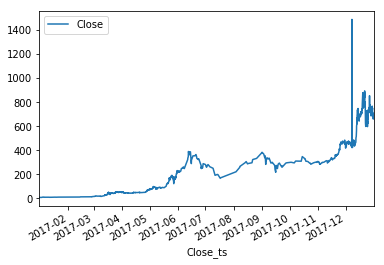

In [399]:
df_OHLCV[df_OHLCV['Market'] == 'ethusd'][['Close', 'Close_ts']].set_index('Close_ts').plot()

In [411]:
df_2 = pd.pivot_table(df_OHLCV, index = 'From', columns = 'Market', values = 'Close')

### Grafico com as cotações de 4 criptomoedas (BTC, LTC, ETH, DASH) contra dolar, durante o ano de 2017


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023082846080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023081336160>], dtype=object)

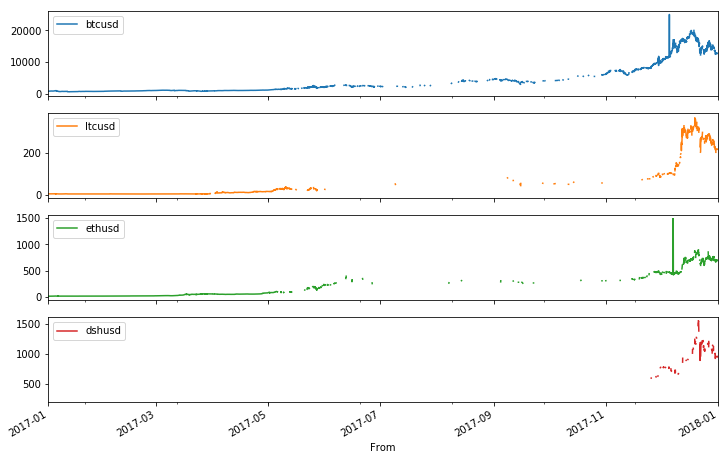

In [427]:
df_2[['btcusd', 'ltcusd', 'ethusd', 'dshusd']].plot(subplots=True, figsize=(12, 8))

### Mesmos dados anteriores, porem completando os dados faltantes com uma interpolação linear

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000230967C8940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002309697D6D8>], dtype=object)

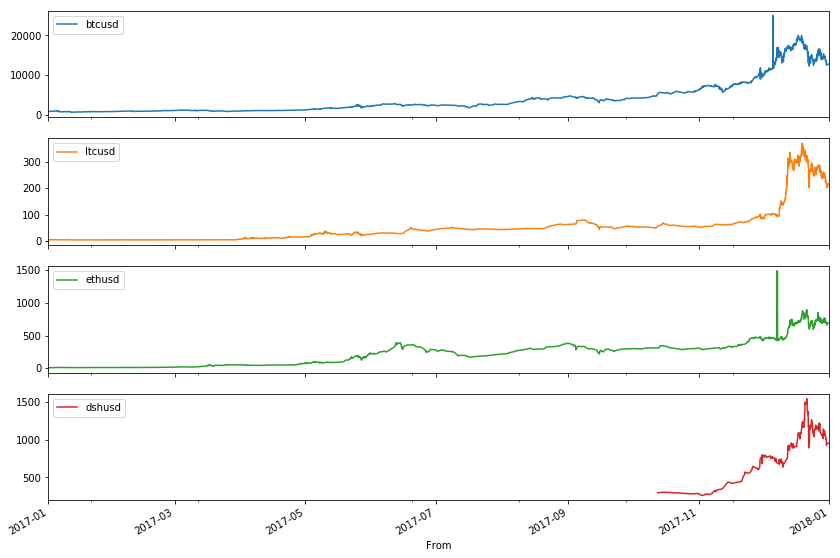

In [482]:
df_2.interpolate()[['btcusd', 'ltcusd', 'ethusd', 'dshusd']].plot(subplots=True, figsize=(14, 10))

In [455]:
def normilized_prices(prices):
    return pd.DataFrame(prices.as_matrix()/prices.as_matrix()[0,:], columns = prices.columns, index = prices.index)

In [456]:
df_normalized =normilized_prices(df_2.interpolate())

### Grafico com os preços normalizados 

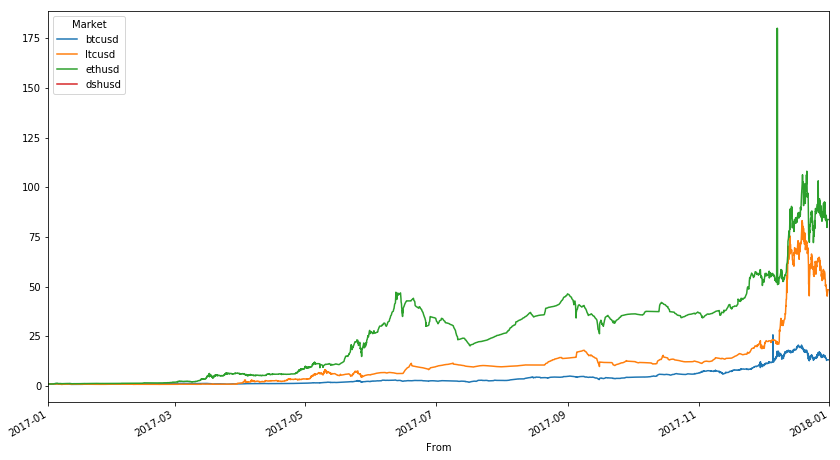

In [480]:
df_normalized[['btcusd', 'ltcusd', 'ethusd', 'dshusd']].plot(figsize=(14, 8))

### Visualizaçoes dos retornos diarios de BTC/USD, ETH/USD e LTC/USD em 2017

In [475]:
daily_rets = df_normalized.pct_change().groupby([daily_rets.index.year, daily_rets.index.month, 
                                                 daily_rets.index.day]).transform(np.mean)

#### BoxPLot dos retornos diários

In [477]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

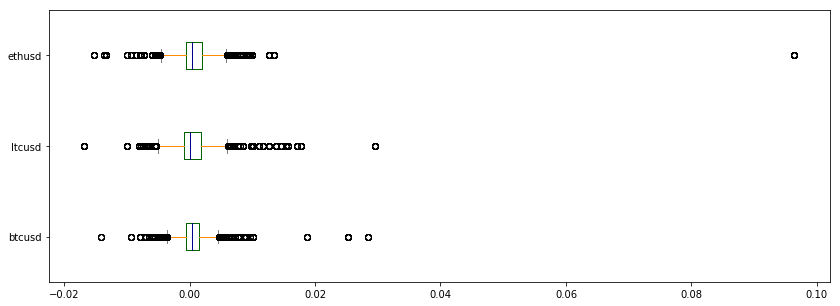

In [492]:
daily_rets[['btcusd', 'ltcusd', 'ethusd']].plot.box(vert = False, color=color, figsize = (14, 5))

#### Visualizaçao da correlaçao entre os retornos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230980014A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023098400EF0>]], dtype=object)

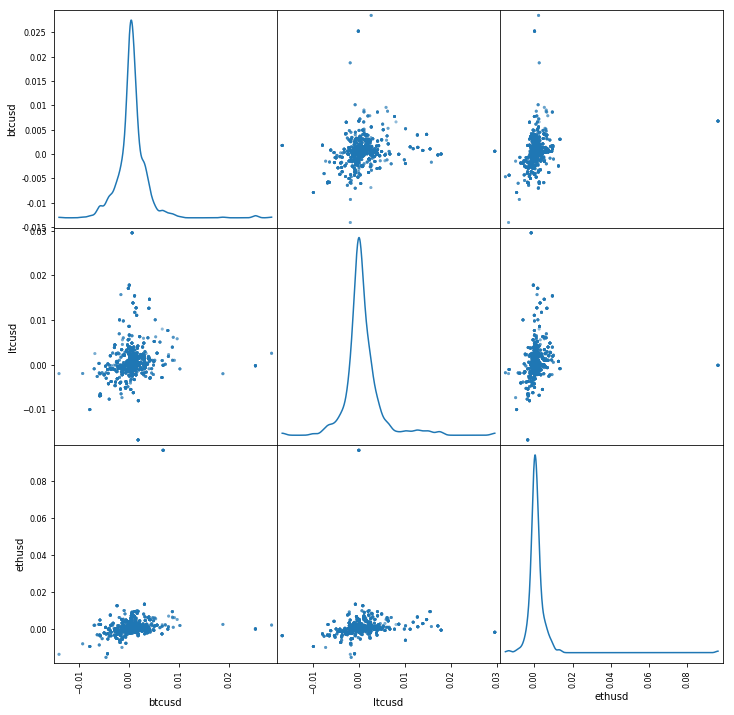

In [485]:
scatter_matrix(daily_rets[['btcusd', 'ltcusd', 'ethusd']], alpha=0.2, figsize=(12, 12), diagonal='kde')

#### Densidade dos retornos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023099603748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023098C853C8>], dtype=object)

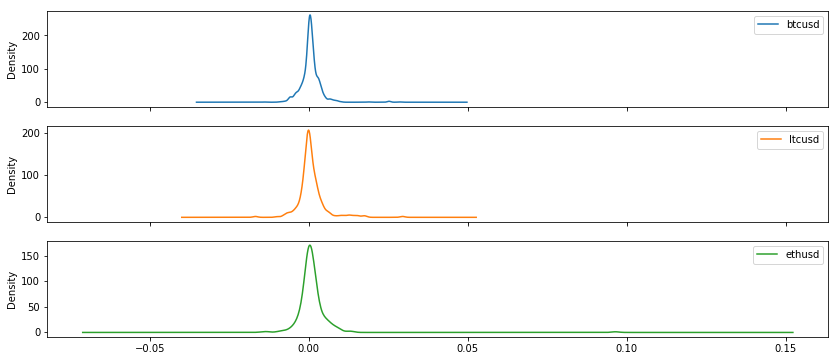

In [494]:
daily_rets[['btcusd', 'ltcusd', 'ethusd']].plot.kde(subplots = True, figsize = (14, 6))